### A simple calibration method
Taking 1 PE from the first peak to the second peak (0PE -> 1PE)

In [1]:
import sys,os,os.path

# tell python to look for the path to analyse
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

from core import processing as proc
from core import plotting as pl
from core import misc as misc
from core import fitting as fit

In [2]:
# load data
file_path = "../../storage/John/testing/"
run_no = "000041"
path = "John/testing/"
full_path = file_path + "RUN" + str(run_no) + '/PMT/analysed_data/ADC_data.npy'
data = np.load(full_path)

In [3]:
x, y = fit.produce_data_points(full_path, negative = True)

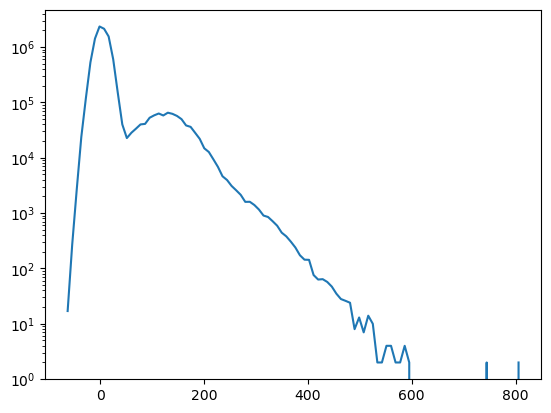

In [4]:
plt.plot(x,y)
plt.yscale('log')

In [5]:
# find 2 peaks
peaks, _ = fit.find_PV(x, y, prom=100, peak_no = 2)
print(peaks)

Peak(s) found at: ([ -1.225 130.325], [2352678   65154])
Valleys(s) found at: ([51.395], [22681])
[ 7 22]


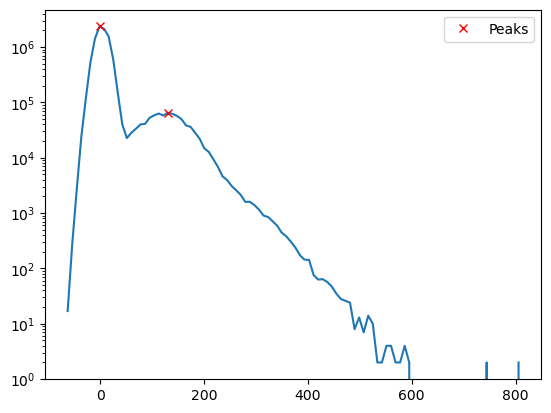

In [6]:
plt.plot(x,y)
plt.yscale('log')
plt.plot(x[peaks], y[peaks], 'xr', label=r'Peaks')
plt.legend()
plt.show()

In [11]:
# take PE adc distance between these two values
print(x[peaks])
one_pe = x[peaks][1] - x[peaks][0]
print("One PE calibration value: {:.2f}".format(one_pe))

[ -1.225 130.325]
One PE calibration value: 131.55


Brais wants a fit for this, rather than this simplistic method. So do so.